In [30]:
import numpy as np
from skimage.io import imread
from skimage.io import imsave
import os
import matplotlib.pyplot as plt
import shutil

In [18]:
def cvid2evf(vid, event_thres = 0.08):
    # convert color video to event frames
    dim0, dim1, dim2, dim3 = np.shape(vid)
    evfFrameNum = dim0 - 1
    lvid = np.log(vid/255.0+1e-10)
    evf = np.zeros((evfFrameNum, dim1, dim2, dim3))
    for i in range(evfFrameNum):
        frame_diff = lvid[i+1] - lvid[i]
        ievf = np.ones(np.shape(frame_diff))*0.5
        ievf[frame_diff>event_thres] = 1.0
        ievf[frame_diff<-event_thres] = 0.0
        evf[i] = ievf
    evNum = np.sum(np.absolute(evf-0.5)*2)
    print("Events number:", evNum, "percentage:", evNum / (dim0*dim1*dim2*dim3)*100)
    return evf

In [4]:
dataFolder = 'adobe-test'
vidList = os.listdir(dataFolder)
print(vidList)

['IMG_0025', 'GOPR9642', 'IMG_0154', 'IMG_0044', 'GOPR9637b', 'GOPR9660', 'IMG_0150', 'IMG_0156', 'IMG_0157', 'IMG_0036', 'IMG_0040', 'IMG_0038', 'IMG_0151', 'IMG_0019', 'IMG_0004b', 'IMG_0056', 'IMG_0169']


IMG_0169
(40, 500, 500, 3)
Events number: 5365164.0 percentage: 17.883879999999998


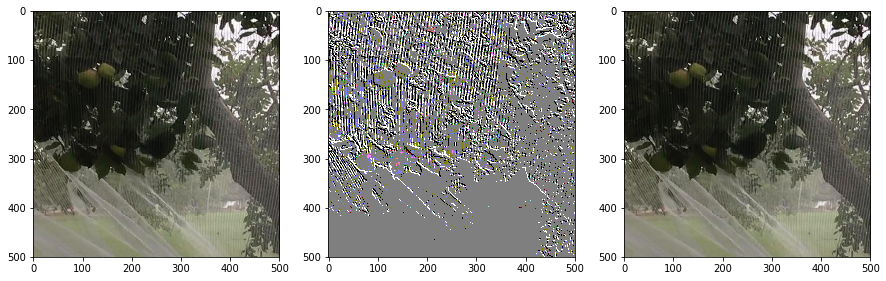

In [97]:
vidId = 16
vidDir = os.path.join(dataFolder, vidList[vidId], 'clip')
video = np.array([imread(os.path.join(vidDir, '%02d.png' % i)) for i in range(40)])
print(vidList[vidId])
print(np.shape(video))
evTh = 0.2
evf = cvid2evf(video, event_thres = evTh)
plt.figure(figsize = (15,5))
plt.subplot(131)
plt.imshow(video[0])
plt.subplot(132)
plt.imshow(evf[0])
plt.subplot(133)
plt.imshow(video[0])

In [98]:
# save files
if os.path.isdir(os.path.join(dataFolder, vidList[vidId], 'event-frames')):
    shutil.rmtree(os.path.join(dataFolder, vidList[vidId], 'event-frames'))
os.mkdir(os.path.join(dataFolder, vidList[vidId], 'event-frames'))
for i in range(np.size(evf, 0)):
    imsave(os.path.join(dataFolder, vidList[vidId], 'event-frames', '%02d.png' % i), evf[i])

/home/winston/anaconda3/envs/py37ml/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: adobe-test/IMG_0169/event-frames/01.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/winston/anaconda3/envs/py37ml/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: adobe-test/IMG_0169/event-frames/04.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/winston/anaconda3/envs/py37ml/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: adobe-test/IMG_0169/event-frames/06.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/winston/anaconda3/envs/py37ml/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: adobe-test/IMG_0169/event-frames/09.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/winston/anaconda3/envs/py37ml/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: adobe-test/IMG_0169/event-frames/11.png is a low contrast image
